In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./healthcare-dataset-stroke-data.csv')
print(df.shape)
df.head()

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
import plotly.express as px

stroke_counts = df['stroke'].value_counts()
fig = px.bar(x=['No stroke',['Stroke']], y=stroke_counts.values)
fig.show()

In [ ]:
# fill in missing bmi values
df['bmi'] = df['bmi'].fillna(round(df['bmi'].median(), 2))
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
# check object type variables/categorical variables
df.describe(exclude = ['float64', 'int64'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [ ]:
# encode categorical variables as numerical values
columns = df.describe(exclude = ['float64', 'int64']).columns.tolist()
for col in columns:
  df[col] = df[col].astype('category').cat.codes

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [ ]:
df = df.loc[:, df.columns!='id']
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, KMeansSMOTE

In [ ]:
X, y = df.iloc[:, 0:-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_test_predict = xgb_model.predict(X_test)
accuracy_score(y_test, y_test_predict)

0.9432485322896281

In [ ]:
confusion_matrix(y_test, y_test_predict)

array([[962,  10],
       [ 48,   2]])

In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.17      0.04      0.06        50

    accuracy                           0.94      1022
   macro avg       0.56      0.51      0.52      1022
weighted avg       0.91      0.94      0.93      1022



In [ ]:
over_sampling = SMOTE()
X, y = over_sampling.fit_resample(X, y)

stroke_counts = y.value_counts()
fig = px.bar(x=['No stroke',['Stroke']], y=stroke_counts.values)
fig.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_test_predict = xgb_model.predict(X_test)
accuracy_score(y_test, y_test_predict)

0.9573264781491002

### Prediction probabilities range

In [ ]:
y_predict_prob = xgb_model.predict_proba(X_test)[:,1]

(array([775.,  74.,  57.,  26.,  32.,  18.,  23.,  27.,  65., 848.]),
 array([3.78748837e-06, 9.99924913e-02, 1.99981198e-01, 2.99969882e-01,
        3.99958581e-01, 4.99947309e-01, 5.99936008e-01, 6.99924707e-01,
        7.99913406e-01, 8.99902105e-01, 9.99890804e-01]),
 <BarContainer object of 10 artists>)

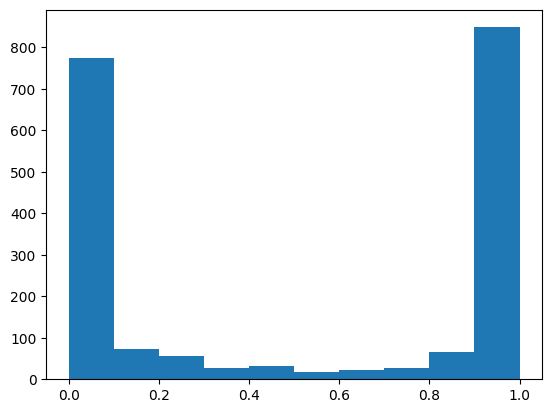

In [ ]:
plt.hist(y_predict_prob)

In [ ]:
confusion_matrix(y_test, y_test_predict)

array([[927,  45],
       [ 38, 935]])

In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       972
           1       0.95      0.96      0.96       973

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945

